In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="white")
# sharper plots
%config InlineBackend.figure_format = 'retina'

In [2]:
X = np.array(
    [
        [2.0, 13.0],
        [1.0, 3.0],
        [6.0, 19.0],
        [7.0, 18.0],
        [5.0, 17.0],
        [4.0, 9.0],
        [5.0, 22.0],
        [6.0, 11.0],
        [8.0, 25.0],
    ]
)

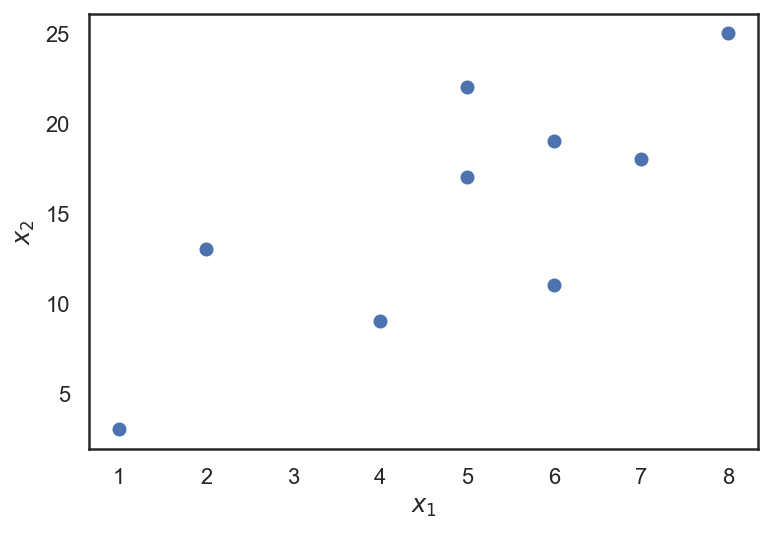

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$");

In [4]:
# Answer
from scipy.linalg import svd

X_scaled = StandardScaler().fit_transform(X)
U, Sigma, VT = svd(X_scaled)
print(VT)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [5]:
# Answer
np.linalg.eig(X_scaled.T.dot(X_scaled))[0]

array([15.96987204,  2.03012796])

In [6]:
lfw_people = datasets.fetch_lfw_people(
    min_faces_per_person=50, resize=0.4, data_home="../../_static/data/faces"
)

print(
    "%d objects, %d features, %d classes"
    % (lfw_people.data.shape[0], lfw_people.data.shape[1], len(lfw_people.target_names))
)
print("\nPersons:")
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


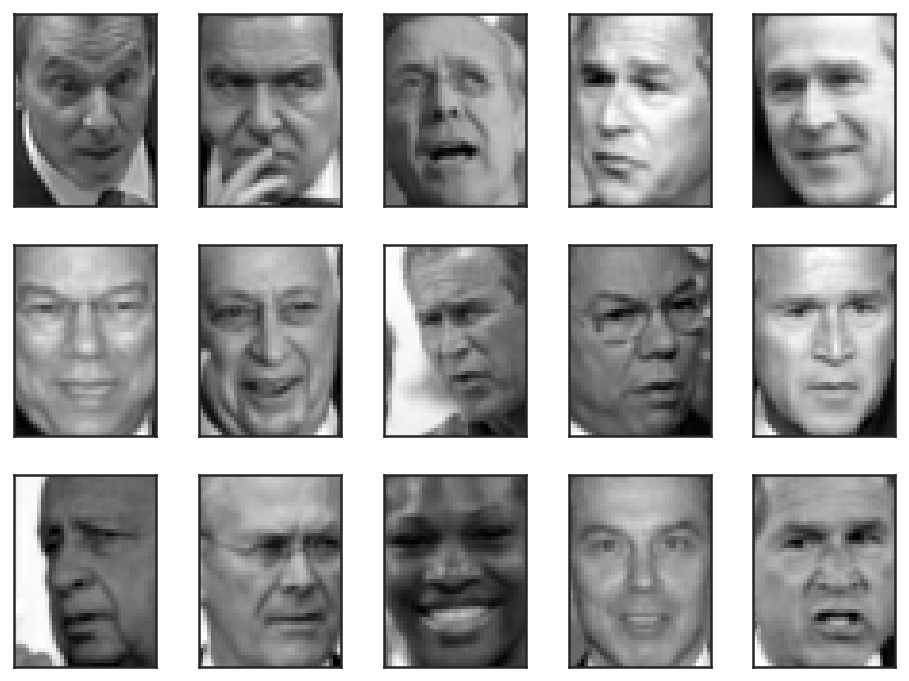

In [7]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap="gray")

1560 principal components explain 100.00% of variance


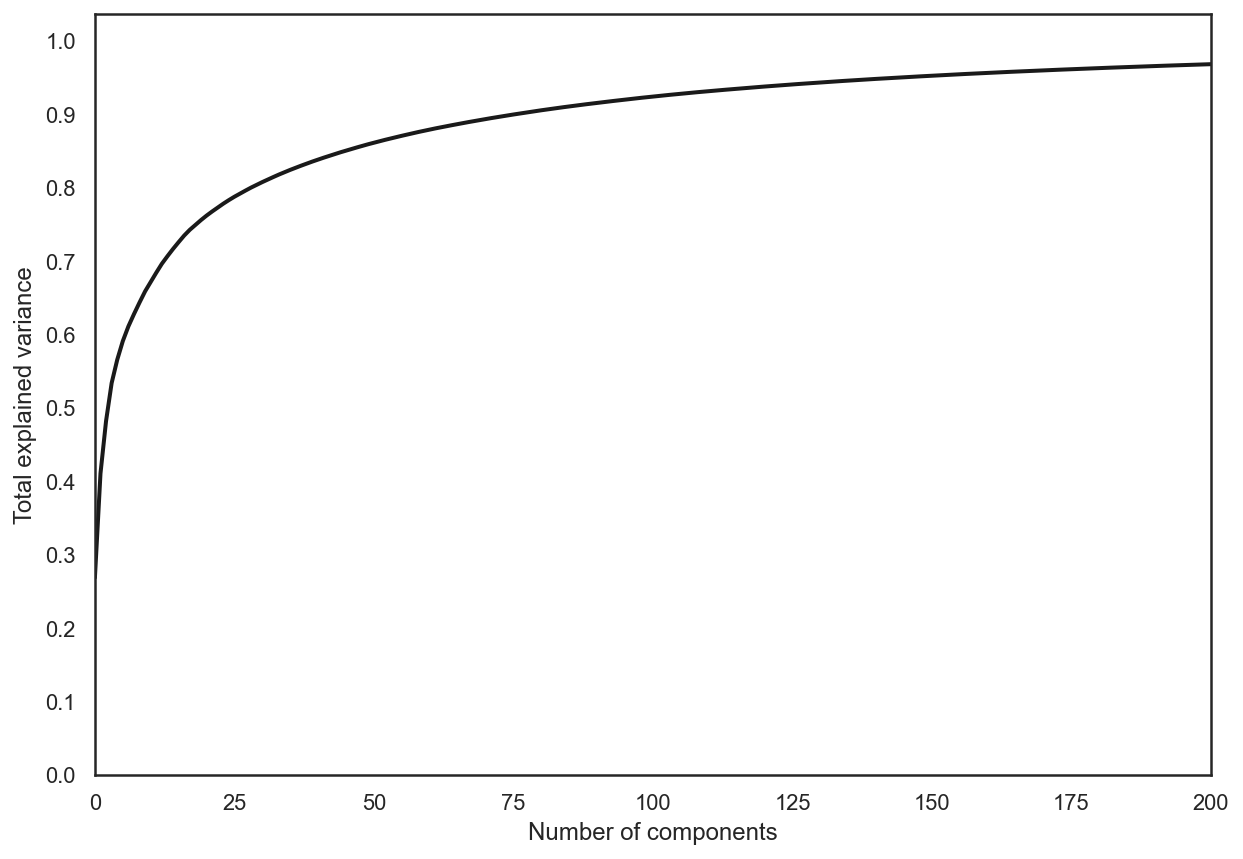

In [8]:
# Answer
pca = PCA(svd_solver="randomized", random_state=1)

scaler = StandardScaler()
faces_scaled = scaler.fit_transform(lfw_people.data)

pca.fit(faces_scaled)

print(
    "%d principal components explain %.2f%% of variance"
    % (pca.n_components_, 100 * np.cumsum(pca.explained_variance_ratio_)[-1])
)
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color="k")
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [9]:
# Note that np.where returns elements' indices so the number of principal components is 76+1 = 77
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)

(array([  76,   77,   78, ..., 1557, 1558, 1559]),)

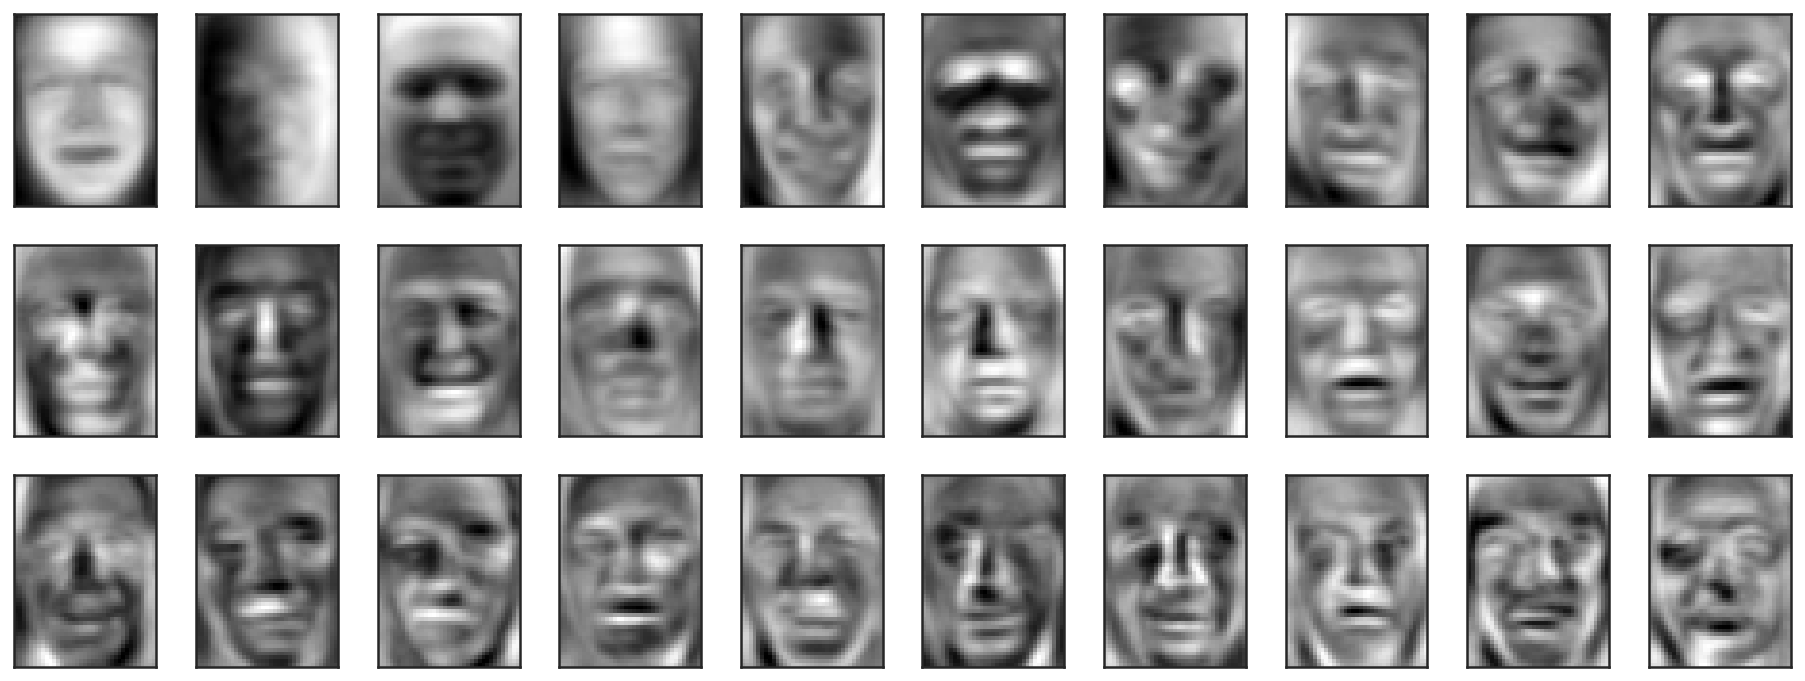

In [10]:
# Answer
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap="binary")

In [11]:
# Answer
lfw_people.target_names, len(lfw_people.target_names)

(array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
        'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
        'Serena Williams', 'Tony Blair'], dtype='<U17'),
 12)

In [12]:
pca = PCA(n_components=2, svd_solver="randomized", random_state=1)
pca.fit(faces_scaled)

mean_face_centers = []

for i, name in enumerate(lfw_people.target_names):
    cloud = pca.transform(faces_scaled[lfw_people.target == i])
    mean_face_centers.append(cloud.mean(axis=0))

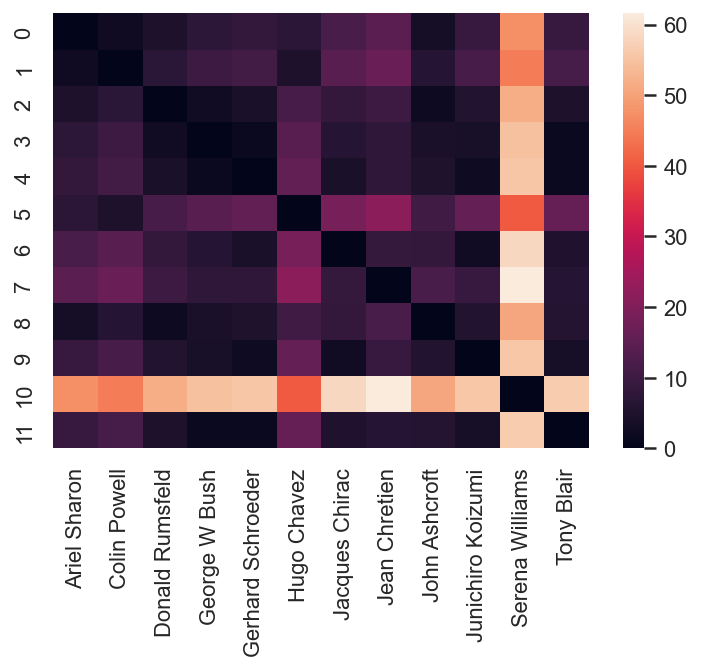

In [13]:
from sklearn.metrics import euclidean_distances

sns.heatmap(euclidean_distances(mean_face_centers))
plt.xticks(np.arange(12) + 0.5, lfw_people.target_names, rotation="vertical");

In [14]:
boston = datasets.load_boston()
X = boston.data

/Users/kashnitskiyy/opt/anaconda3/envs/mlcourse/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

k=2: D(k)=0.325
k=3: D(k)=0.625
k=4: D(k)=0.328
k=5: D(k)=1.018
k=6: D(k)=0.632
k=7: D(k)=0.681
k=8: D(k)=0.907


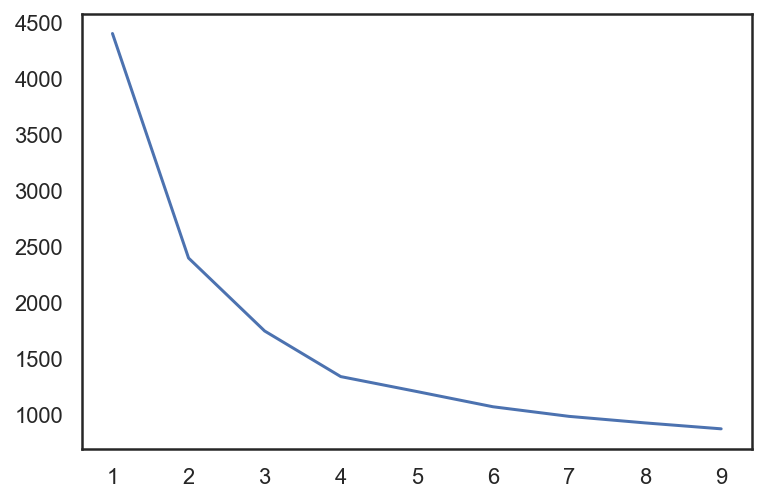

In [15]:
# Answer
func = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    func.append(np.sqrt(kmeans.inertia_))


scores = []
for i in range(1, 8):
    scores.append((func[i] - func[i + 1]) / (func[i - 1] - func[i]))
    print("k={}: D(k)={}".format(i + 1, round(scores[i - 1], 3)))
plt.plot(range(1, 10), func);

In [16]:
# Answer
from sklearn.cluster import (AffinityPropagation, AgglomerativeClustering,
                             KMeans, SpectralClustering)

algorithms = [
    KMeans(n_clusters=12, random_state=1),
    AffinityPropagation(),
    SpectralClustering(n_clusters=12, random_state=1, affinity="nearest_neighbors"),
    AgglomerativeClustering(n_clusters=12),
]

res = []
for algo in algorithms:
    algo.fit(faces_scaled)
    res.append(
            {
                "ARI": metrics.adjusted_rand_score(lfw_people.target, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(
                    lfw_people.target, algo.labels_
                ),
                "Homogenity": metrics.homogeneity_score(
                    lfw_people.target, algo.labels_
                ),
                "Completeness": metrics.completeness_score(
                    lfw_people.target, algo.labels_
                ),
                "V-measure": metrics.v_measure_score(lfw_people.target, algo.labels_),
                "Silhouette": metrics.silhouette_score(faces_scaled, algo.labels_),
            }
    )

results = pd.DataFrame(
    data=res,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["KMeans", "Affinity", "Spectral", "Agglomerative"],
)

In [17]:
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.027093,0.072943,0.095802,0.083819,0.089410,0.044945
Affinity,0.014616,0.118340,0.305615,0.154552,0.205288,0.019190
Spectral,0.026194,0.079021,0.099480,0.093259,0.096269,0.039685
Agglomerative,0.027382,0.077457,0.099838,0.089044,0.094132,0.025744


In [18]:
# And check the last statement
algorithms2 = [
    KMeans(n_clusters=2, random_state=1),
    AffinityPropagation(),
    SpectralClustering(n_clusters=2, random_state=1, affinity="nearest_neighbors"),
    AgglomerativeClustering(n_clusters=2),
]

is_serena = (lfw_people.target == 10).astype("int")

res2 = []
for algo in algorithms2:
    algo.fit(faces_scaled)
    res2.append(
            {
                "ARI": metrics.adjusted_rand_score(is_serena, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(is_serena, algo.labels_),
                "Homogenity": metrics.homogeneity_score(is_serena, algo.labels_),
                "Completeness": metrics.completeness_score(is_serena, algo.labels_),
                "V-measure": metrics.v_measure_score(is_serena, algo.labels_),
                "Silhouette": metrics.silhouette_score(faces_scaled, algo.labels_),
            }
    )

results2 = pd.DataFrame(
    data=res2,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["KMeans", "Affinity", "Spectral", "Agglomerative"],
)
results2

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.027811,0.070053,0.200508,0.042976,0.070781,0.145569
Affinity,0.001555,0.033613,0.675966,0.023447,0.045322,0.019190
Spectral,0.104632,0.108844,0.276347,0.068378,0.109630,0.161030
Agglomerative,0.026231,0.061530,0.176463,0.037801,0.062264,0.119324


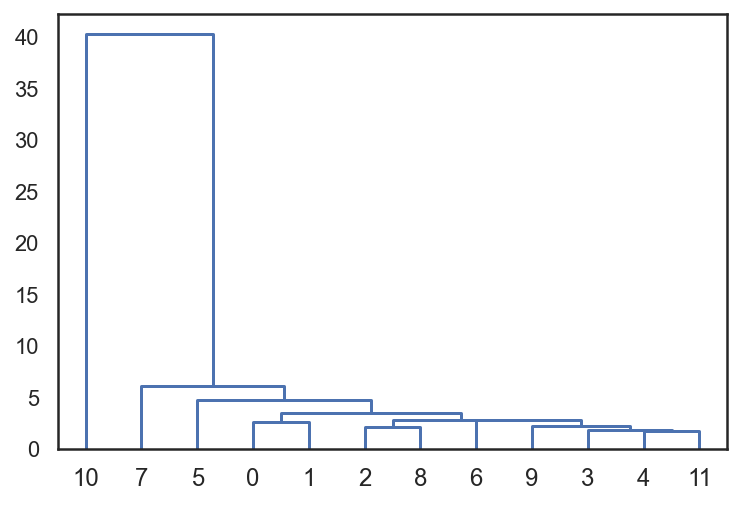

In [19]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

""" Your code is here """
distance_mat = pdist(mean_face_centers)

Z = hierarchy.linkage(distance_mat, "single")
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

In [20]:
# Answer
lfw_people.target_names[7]

'Jean Chretien'